Importing the pyvis and matplotlib libraries

In [1]:
# This library is used to display the network
from pyvis.network import Network

# This library is used to plot the graphs ex: histogram
import matplotlib.pyplot as plt

# created netowrk object, to display in notebook with html size specifications
net = Network(notebook=True, height='750px', width='100%', font_color='black')
net.force_atlas_2based(spring_length=200)

Reading the network connections and devices data into lists and sorting the nodes data

In [2]:
# reading a text data file 
with open('routers_data_undirected.txt') as f:
    lines = f.readlines()

# initializing variable for node degree distribution.
histogramDict= {}

# reading each line from the lines object to get data
for line in lines:
    sourceNodeID = int(line.split("\t")[0])    # accessing the source Node
    targetNodeID = int(line.split("\t")[1])    # accessing the target Node
    if sourceNodeID < 220:                     # consideing only the node id's in range of 0 to 219
        
        # add the source node to network
        net.add_node(str(sourceNodeID), size = 1, title=str(sourceNodeID))
        
        # add the source node to network
        net.add_node(str(targetNodeID), size = 1, title=str(targetNodeID))
        
        # add the edge between source node and target node to network
        net.add_edge(str(sourceNodeID), str(targetNodeID))
    
    # add source node and target node to the histogram dictinary to calculate node degree distribution
    if sourceNodeID not in histogramDict:
        histogramDict[sourceNodeID] = 1
    else:
        histogramDict[sourceNodeID] += 1
    
    if targetNodeID not in histogramDict:
        histogramDict[targetNodeID] = 1
    else:
        histogramDict[targetNodeID] += 1


Modifying title and value to the network such that, size of node is with respect to number of connections and on hover of node shows number of neighbors and neighbor id's

In [3]:
# Get the neighbor map suchas each node to its corresponding neighbor nodes count
neighbor_map = net.get_adj_list()

# Iterate through each node such that title in each node is added with neighbor node counts and neighbor node id's...
# ... also adding value with count of neighbors to each node.
for node in net.nodes:
    node['title'] += ' node has '+ str(len(neighbor_map[node['id']])) +' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])
    node['size'] = len(neighbor_map[node['id']])
    if node['value'] == 1:
        node['color'] = '#00fed4'
    elif node['value'] > 1 and node['value'] < 30:
        node['color'] = '#00bffe'
    elif node['value'] >= 30 and node['value'] < 60:
        node['color'] = '#00a5fe'
    elif node['value'] >= 60 and node['value'] < 90:
        node['color'] = '#0098fe'
    elif node['value'] >= 90 and node['value'] < 150:
        node['color'] = '#0066fe'
    else:
        node['color'] = '#0022fe'
        
        
# create and display the network
net.show("node_0_219.html")

Plotting the node degree distribution histogram using matplotlib library for 192244 nodes

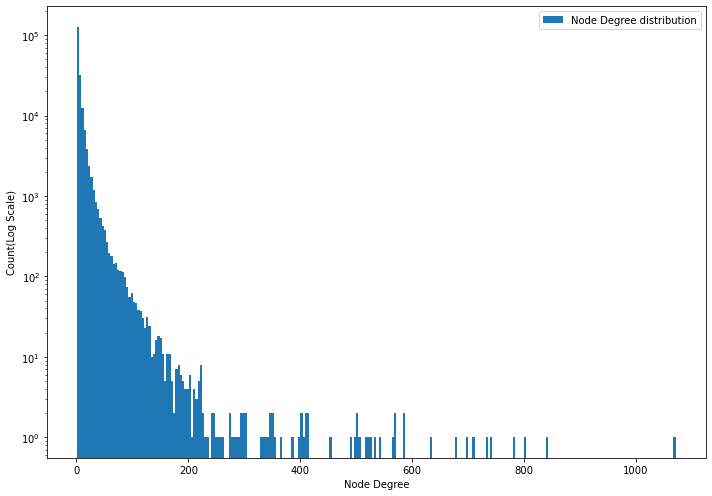

In [4]:
# adding legened to specify what graph means.
legend = ['Node Degree distribution']

# specifying size and layout style of histogram.
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)

axs.set_yscale('log')

# creating a frequency list which contains node degree frequency, sorting them in ascending order
frequencyList = list(histogramDict.values())
frequencyList.sort()

# creaing histogram with node degree list and count on x-axis and y-axis respectively with labels.
axs.hist(frequencyList, bins=len(set(frequencyList)))
plt.xlabel("Node Degree")
plt.ylabel("Count(Log Scale)")
plt.legend(legend)
# plotting the graph for 192244 nodes
plt.show()

In [1]:
frequencyList.count(1)

NameError: name 'frequencyList' is not defined